# Project Two

Q: How can I determine the sugar stage at my candy is at given a constant volume of sugar, an initial stove temperature, and a given time?

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def make_system(conductivity, area, thickness, mass, sugarconductivity):
    """Make a system object for the candymaking model.
    
    alpha: thermal transfer rate 
    
    returns: System object
    """
    init = State(C=22)
    init /= np.sum(init)

    t0 = 1
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end,
                  conductivity=conductivity, area=area, thickness=thickness,
                  mass=mass, sugarconductivity=sugarconductivity)

In [3]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State with variables C aka candy
    t: time step
    system: System with beta and gamma
    
    returns: State object
    """
    C = state.C
    
    unpack(system)
    
    dT = 180 - C
    heat = conductivity * area * dT / thickness * mass * sugarconductivity * .01
    
    
    C += heat
    
    return State(C=C)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [5]:
conductivity = 385
area = .50265
thickness = 5
mass = 1
sugarconductivity = .3
system = make_system(conductivity, area, thickness, mass, sugarconductivity)

,values
init,C 1.0 dtype: float64
t0,1
t_end,200
conductivity,385
area,0.50265
thickness,5
mass,1
sugarconductivity,0.3


In [6]:
results = run_simulation(system, update_func)

,C
1,1.000000
2,21.784075
3,40.154866
4,56.392585
5,70.744908
6,83.430752
7,94.643615
8,104.554528
9,113.314664
10,121.057642


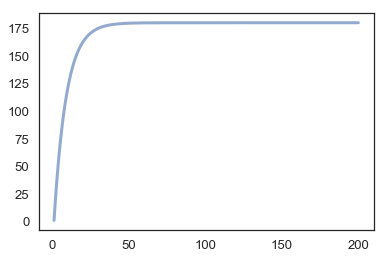

In [7]:
plot(results.C) from 